In [1]:
import gym
import numpy as np
import time
import matplotlib.pyplot as plt
import tensorflow

class thetrain():
  def __init__(self):
    '''The innit thing!?'''
    self.env = gym.make('FrozenLake-v1', render_mode="rgb_array", is_slippery=False)
    self.STATES = self.env.observation_space.n                      #size of the
    self.ACTIONS = self.env.action_space.n                          #getting possible actions
    self.Q = np.zeros((self.STATES, self.ACTIONS))


  def startthetrain(self, tries=1000, steps=100, learnin_rate=0.8, gamma = 0.95, epsilon=0.9, render=False):
    '''Start the train (explanotary)'''
    self.tries=tries
    if render:
      plt.ion()
      figure, ax = plt.subplots(figsize=(10, 8))
    
    self.rewards = [];self.score=[]
    
    for episode in range(tries):
      state = self.env.reset()[0]
      
      for _ in range(steps):
        if render:
          ax.imshow(self.env.render())
          ax.text(250,0, f'died: {str(deadcount)}', bbox=dict(facecolor='red', alpha=0.5))
          ax.text(250,10, f'win: {str(wincount)}', bbox=dict(facecolor='green', alpha=0.5))
          figure.canvas.draw()
          figure.canvas.flush_events()
          time.sleep(0.02)

          action = self.env.action_space.sample() if np.random.uniform(0, 1) < epsilon else np.argmax(self.Q[state, :])     ## use Q table to pick best action based on current values

        next_state, reward, done, _, _ = self.env.step(action)

        self.Q[state, action] = self.Q[state, action] + learnin_rate * (reward + gamma * np.max(self.Q[next_state, :]) - self.Q[state, action])

        state = next_state
        
        if done:                                                #either dead or get to the finish line
          self.rewards.append(reward)
          self.score.append(sum(self.rewards)/len(self.rewards))
          epsilon -= 0.001
          break  # reached goal
        
  def visualizeresult(self):
    plt.plot(np.arange(0,self.tries), self.score, c="red")
    plt.xlabel("tries");plt.ylabel("score")
    plt.show()
          

ModuleNotFoundError: No module named 'gym'

: 

In [69]:
test=thetrain()
test.startthetrain(tries=10000, render=False)

In [70]:
print(test.Q)
test.score[-1]

[[0.73509189 0.77378094 0.77378094 0.73509189]
 [0.73509189 0.         0.81450625 0.77378094]
 [0.77378094 0.857375   0.77378094 0.81450625]
 [0.81450625 0.         0.7737809  0.77378093]
 [0.77378094 0.81450625 0.         0.73509189]
 [0.         0.         0.         0.        ]
 [0.         0.9025     0.         0.81450625]
 [0.         0.         0.         0.        ]
 [0.81450625 0.         0.857375   0.77378094]
 [0.81450625 0.9025     0.9025     0.        ]
 [0.857375   0.95       0.         0.857375  ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.9025     0.95       0.857375  ]
 [0.9025     0.95       1.         0.9025    ]
 [0.         0.         0.         0.        ]]


0.9517

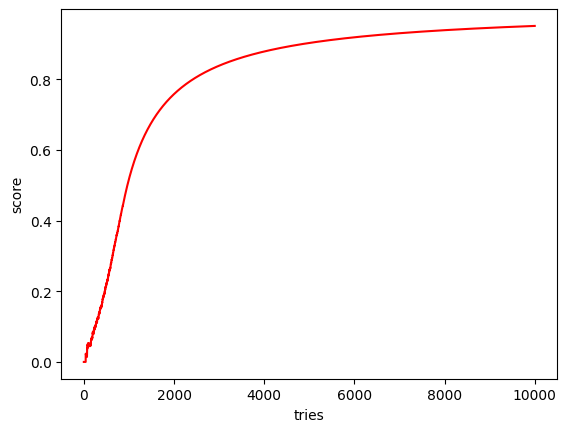

In [71]:
test.visualizeresult()